


### CBR




case1:categorical target (classification)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/데이터마이닝/CBR/new_train.csv")

In [ ]:
data

In [ ]:
data.loc[data['y'] == 'yes','y']= 1
data.loc[data['y'] == 'no','y']= 0
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,0
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,0
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,0
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,0


In [ ]:
x = data.loc[:,['age','duration','campaign','pdays','previous']]
y = data.loc[:,'y']

In [ ]:
y = pd.DataFrame(y)
y.columns = ['target_y']
y = y.astype('int')

In [ ]:
print(y['target_y'].value_counts()) 

0    29238
1     3712
Name: target_y, dtype: int64


y값의 분포가 unbalanced

In [ ]:
x.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


각 변수마다 범위 차이가 많이 나므로 scaling 진행

In [ ]:
# Z-score Standardization
from sklearn.preprocessing import StandardScaler
scaled_x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns, index = x.index)

In [ ]:
scaled_x.describe() # 표준화 이후, 독립변수(feature)의 기초통계량

,age,duration,campaign,pdays,previous
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04
mean,2.510620e-16,-6.879003e-17,-5.692968e-17,-1.898734e-16,-2.266944e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.212156e+00,-9.967389e-01,-5.670225e-01,-5.118709e+00,-3.501269e-01
25%,-7.703301e-01,-5.990125e-01,-5.670225e-01,1.965838e-01,-3.501269e-01
50%,-1.935999e-01,-3.016831e-01,-2.036879e-01,1.965838e-01,-3.501269e-01
75%,6.714954e-01,2.350545e-01,1.596467e-01,1.965838e-01,-3.501269e-01
max,5.573702e+00,1.799373e+01,1.941638e+01,1.965838e-01,1.367745e+01


In [ ]:
from sklearn.model_selection import train_test_split
# train,test,valid 분할 과정에서 y 값의 분포 유지 위해 stratify 사용
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 312, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312, stratify=y_train)

In [ ]:
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (21088, 5)
valid set: (5272, 5)
test set: (6590, 5)


In [ ]:
#y 값 분포
y_train.value_counts()

target_y
0           18712
1            2376
dtype: int64

y 샘플링

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=312, sampling_strategy='majority').fit_resample(x_train, y_train)

In [ ]:
print(y_resampled['target_y'].value_counts())

0    2376
1    2376
Name: target_y, dtype: int64


KNN classification

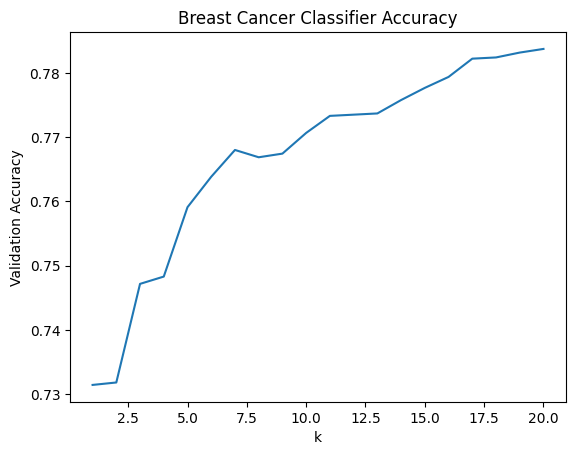

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

k_list = range(1,21) # k= 1~20까지 조절
accuracies = []
best_k = 0
best_acc = 0
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance", metric="euclidean")
    classifier.fit(X_resampled, y_resampled['target_y'])
    acc = classifier.score(x_valid, y_valid)
    accuracies.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_k = k
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = best_k, weights="distance", metric="euclidean")
classifier.fit(X_resampled, y_resampled['target_y'])

KNeighborsClassifier(metric='euclidean', n_neighbors=20, weights='distance')

In [ ]:
print(classifier.score(x_test, y_test)) # accuracy

0.7916540212443096


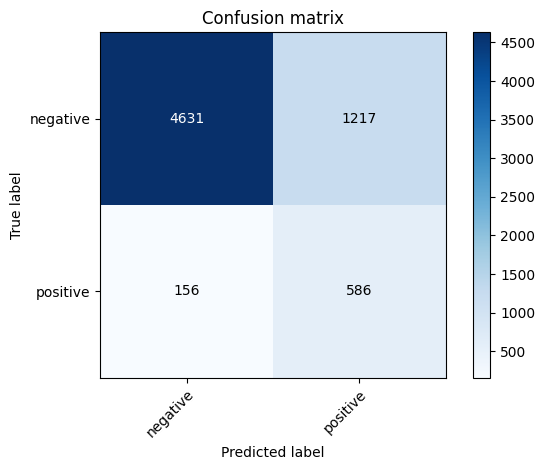

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = classifier.predict(x_test) # 분류 모델
cm = confusion_matrix(y_test, y_pred) # 예측 데이터와 예측값의 정답(y_true)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['negative', 'positive'], # 표에 표시할 labels
       yticklabels=['negative', 'positive'], # 표에 표시할 labels
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", 
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("   Recall:", recall_score(y_test, y_pred))
print(" F1 score:", f1_score(y_test, y_pred))

 Accuracy: 0.7916540212443096
Precision: 0.3250138657792568
   Recall: 0.7897574123989218
 F1 score: 0.4605108055009823


case2:continuous target(regression)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/50_Startups(final).csv') 
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


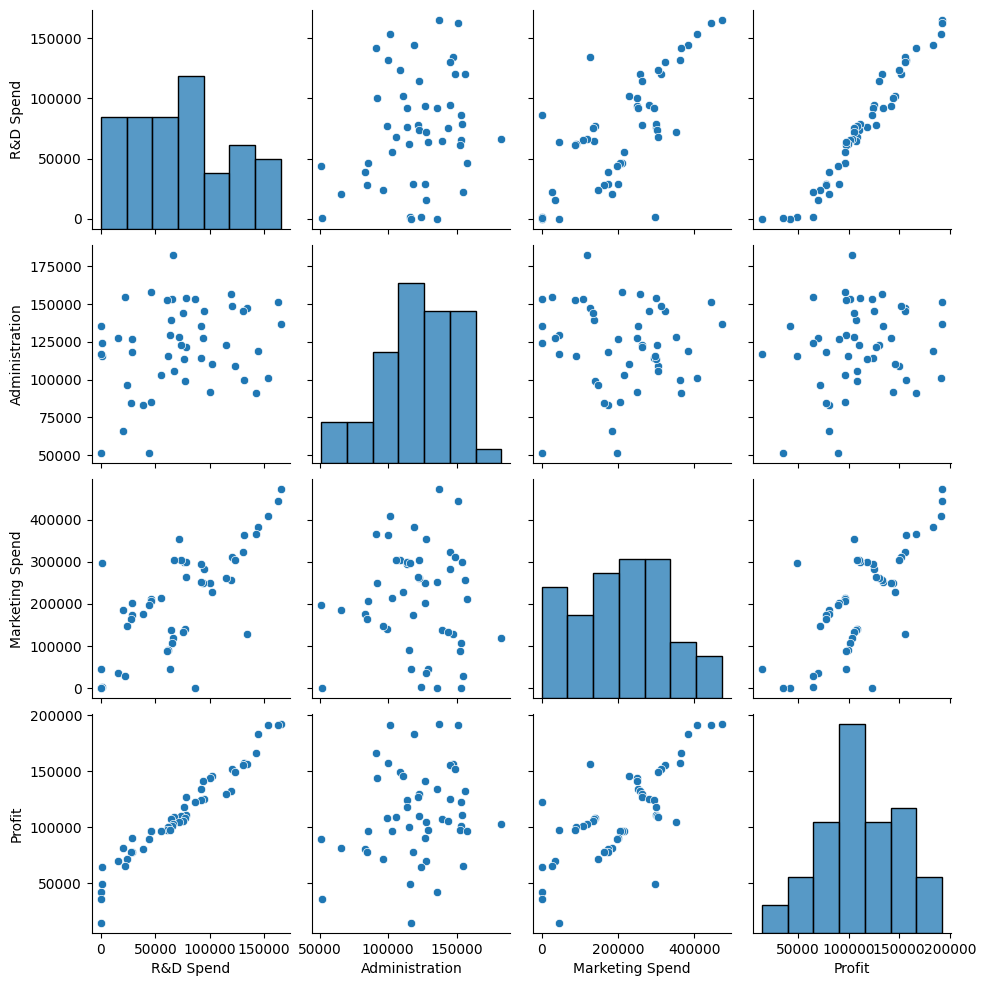

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split
x = df[["R&D Spend", "Administration", "Marketing Spend"]]
y = df[["Profit"]]

In [10]:
# Z-score standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_std = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312)

In [12]:
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (32, 3)
valid set: (8, 3)
test set: (10, 3)




```
# This is formatted as code
```

KNN regression

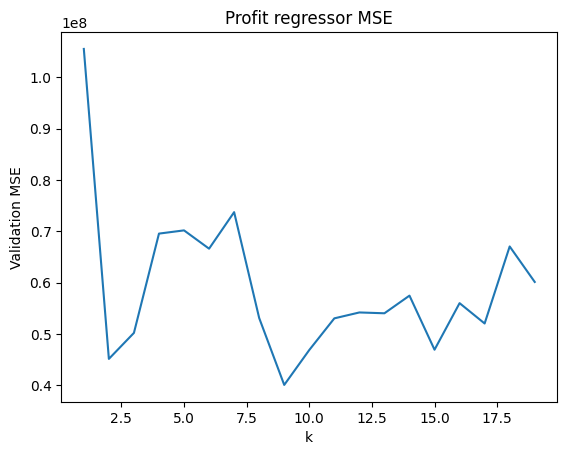

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

best_mse = 1000000000
k_list = range(1,20) # k= 1~20까지 조절
mses = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, weights = "distance")
  regressor_k.fit(x_train, y_train)
  mse = mean_squared_error(y_valid, regressor_k.predict(x_valid))
  mses.append(mse)
  if best_mse > mse:
    best_mse = mse
    best_k = k
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Validation MSE")
plt.title("Profit regressor MSE")
plt.show()

In [27]:
regressor = KNeighborsRegressor(n_neighbors = best_k, weights = "distance")

In [28]:
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [29]:
pred_y = regressor.predict(x_test)
pred_y[:5]

array([[ 79948.05015149],
       [ 79958.85168022],
       [ 78043.11891443],
       [147292.76619699],
       [ 92121.16745575]])

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("MSE :", mean_squared_error(y_test, pred_y))
print("RMSE:", mean_squared_error(y_test, pred_y, squared=False))
print("MAE :", mean_absolute_error(y_test, pred_y))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_y))

MSE : 296474517.8419266
RMSE: 17218.43540632907
MAE : 13312.95866968669
MAPE: 0.21775031279172735


AR

In [18]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AR_Data.csv", sep=';')

In [ ]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data.describe()

,Quantity,Price,CustomerID
count,522064.000000,522064.000000,388023.000000
mean,10.090435,3.826801,15316.931710
std,161.110525,41.900599,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
'''
1) orders로 이루어진 DataFrame을 nested list (장바구니) 형태로 변경
   - order_id가 동일한 item_name을 하나의 리스트로 묶음
   - 이 때, apriori 알고리즘의 정의에 의해, 중복된 연관 규칙은 제거할 필요가 있음
'''

data_tmp = data.groupby('CustomerID')['Itemname'].apply(set).apply(list).to_list()
print(data_tmp[:10])

[['MEDIUM CERAMIC TOP STORAGE JAR'], ['REGENCY CAKESTAND 3 TIER', 'TEA TIME OVEN GLOVE', 'AIRLINE BAG VINTAGE WORLD CHAMPION', 'CHRISTMAS METAL TAGS ASSORTED', 'FOOD CONTAINER SET 3 LOVE HEART', '60 TEATIME FAIRY CAKE CASES', 'BOOM BOX SPEAKER BOYS', 'NAMASTE SWAGAT INCENSE', 'MINI PLAYING CARDS DOLLY GIRL', 'WATERING CAN PINK BUNNY', 'REVOLVER WOODEN RULER', 'SET/3 DECOUPAGE STACKING TINS', 'RED REFECTORY CLOCK', 'RED RETROSPOT PURSE', 'REGENCY TEAPOT ROSES', 'SINGLE ANTIQUE ROSE HOOK IVORY', 'BLUE DRAWER KNOB ACRYLIC EDWARDIAN', 'GREEN REGENCY TEACUP AND SAUCER', 'BLACK EAR MUFF HEADPHONES', 'BICYCLE PUNCTURE REPAIR KIT', 'MINI PAINT SET VINTAGE', 'LARGE HEART MEASURING SPOONS', 'REGENCY MILK JUG PINK', '3D SHEET OF DOG STICKERS', 'MINI PLAYING CARDS SPACEBOY', 'PACK OF 60 SPACEBOY CAKE CASES', 'BLACK GRAND BAROQUE PHOTO FRAME', 'BIRDCAGE DECORATION TEALIGHT HOLDER', 'TEA TIME DES TEA COSY', '72 SWEETHEART FAIRY CAKE CASES', '3D SHEET OF CAT STICKERS', 'CAMOUFLAGE EAR MUFF HEADPHONES

In [ ]:
'''
2) nested list (장바구니)를 association rule을 찾기 위한 dataframe의 형태로 변경
  - via the fit method, the TransactionEncoder learns the unique labels in the dataset
  - via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
'''
te = TransactionEncoder()
te_ary = te.fit_transform(data_tmp) # df_tmp를 장바구니 형태로 변경 (fit과 transform을 동시에 진행)
print(te_ary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]]


In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_) # label 정보는 te.columns_에 저장되어 있으므로, 해당 값을 칼럼명으로 하는 데이터 프레임으로 변경.
df.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
''' Apriori Algorithm 활용
- 빈번하게 발생하는 아이템 셋에 대해서만 계산 (minimum support를 넘지 못하는 아이템을 포함하는 모든 아이템셋은 minimum support를 넘지 못함)
1. Support
- Minimum support를 지정하여, 등장 횟수가 일정 비율 이상의 아이템 set만 선정
  - 1) 각 item들에 대해 지지도를 계산 후 minimum 지지도가 넘는 items를 선정
  - 2) 1에서 구한 items들의 2개 조합으로 구성한 set을 생성 후 지지도 계산 (minimum 이상)
  - 3) 2에서 구한 set들의 조합으로, 3개의 item으로 구성된 항목에 대해 지지도 계산
  - 4) minimum 값을 넘는 조합이 없을 때까지 조합에 포함되는 item 개수를 늘려줌
'''
frequent_itemsets = apriori(df, min_support=0.07, use_colnames=True) # 여기서는 0.07를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
85,0.202234,(REGENCY CAKESTAND 3 TIER)
109,0.196416,(WHITE HANGING HEART T-LIGHT HOLDER)
72,0.162439,(PARTY BUNTING)
7,0.156621,(ASSORTED COLOUR BIRD ORNAMENT)
94,0.147079,(SET OF 3 CAKE TINS PANTRY DESIGN)
...,...,...
73,0.070980,(PINK CREAM FELT CRAFT TRINKET BOX)
44,0.070514,(JUMBO BAG PINK VINTAGE PAISLEY)
9,0.070282,(BLUE HARMONICA IN BOX)
115,0.070049,(WORLD WAR 2 GLIDERS ASSTD DESIGNS)


In [ ]:
'''
2. Confidence
- 앞서 선정한 items (많이 구매된 메뉴)을 사용하여 함께 구매된 items를 확인
- antecedents (조건절), consequents (결과절): Antecedents를 구매했을 때 consequents를 구매
'''
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).sort_values(by = ['confidence', 'lift', 'support'], ascending=False) # 최소 confidence를 0.1로 지정

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.088667,0.097044,0.073307,0.826772,8.519515,0.064702,5.212516
8,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.088201,0.196416,0.071212,0.807388,4.110599,0.053888,4.172031
1,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.097044,0.088667,0.073307,0.755396,8.519515,0.064702,3.725746
11,(ROSES REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.097044,0.202234,0.073307,0.755396,3.735253,0.053681,3.261455
7,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.108680,0.141727,0.075401,0.693790,4.895265,0.059999,2.802892
5,(LUNCH BAG CARS BLUE),(LUNCH BAG RED RETROSPOT),0.110542,0.122411,0.070980,0.642105,5.245487,0.057448,2.452087
2,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.112171,0.132185,0.070980,0.632780,4.787070,0.056152,2.363202
4,(LUNCH BAG RED RETROSPOT),(LUNCH BAG CARS BLUE),0.122411,0.110542,0.070980,0.579848,5.245487,0.057448,2.116990
3,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.132185,0.112171,0.070980,0.536972,4.787070,0.056152,1.917440
6,(PAPER CHAIN KIT 50'S CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.141727,0.108680,0.075401,0.532020,4.895265,0.059999,1.904609


In [ ]:
'''
3. Lift
- 1보다 클 경우 A를 샀을 때 B을 살 확률이 높아지는 것을 의미
- 1보다 작을 경우 A를 샀을 때 B을 사지 않을 확률이 높은 것을 의미  
'''
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by = [ 'lift', 'confidence', 'support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.088667,0.097044,0.073307,0.826772,8.519515,0.064702,5.212516
1,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.097044,0.088667,0.073307,0.755396,8.519515,0.064702,3.725746
5,(LUNCH BAG CARS BLUE),(LUNCH BAG RED RETROSPOT),0.110542,0.122411,0.070980,0.642105,5.245487,0.057448,2.452087
4,(LUNCH BAG RED RETROSPOT),(LUNCH BAG CARS BLUE),0.122411,0.110542,0.070980,0.579848,5.245487,0.057448,2.116990
7,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.108680,0.141727,0.075401,0.693790,4.895265,0.059999,2.802892
6,(PAPER CHAIN KIT 50'S CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.141727,0.108680,0.075401,0.532020,4.895265,0.059999,1.904609
2,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.112171,0.132185,0.070980,0.632780,4.787070,0.056152,2.363202
3,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.132185,0.112171,0.070980,0.536972,4.787070,0.056152,1.917440
8,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.088201,0.196416,0.071212,0.807388,4.110599,0.053888,4.172031
9,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.196416,0.088201,0.071212,0.362559,4.110599,0.053888,1.430406


# Collaborative Filtering (협업 필터링)

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/rating.xlsx')

In [ ]:
df.head() # 6만건의 도서 리뷰 데이터, 제목은 book_id로 대체되어 있다.

도서의 제목에 대한 데이터는 books.xlsx로 따로 첨부하였다. 파일에는 book_id에 따른 제목이 정리되어 있다.

In [ ]:
df = df.pivot_table('rating', index = 'user_id', columns = 'book_id')
df.head()

In [ ]:
df.shape

In [ ]:
import numpy as np
df_scaled = df.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

## Item-based collaborative filtering
- Item*user으로 구성된 matrix를 사용하여 유사도 측정 (nan 값을 0으로 대체)

In [ ]:
df_scaled = df_scaled.transpose().fillna(0)
df_scaled.head(5)

- user들 간 평점이 비슷한 정도를 기반으로 영화들의 유사도 평가

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
book_sim = cosine_similarity(df_scaled, df_scaled)
# item by item 으로 구성된 행렬
print(book_sim.shape)

In [ ]:
book_sim = pd.DataFrame(book_sim, index = df_scaled.index, columns = df_scaled.index)

In [ ]:
book_sim.head()

In [ ]:
book_sim[2].sort_values(ascending=False)[:10]